### Fill out:
Name & Surname: Brian Hermawan

Student ID:34370560

## W7&W8 post studio exercises (multivariate linear regression, regularisation)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to add comments in markdown cell after each exercise. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

We will use diabetes data. Download this data from [the Gitlab site](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/tree/main/Machine-Learning/Supervised-Methods/Regression/Diabetes_Data.csv) into the same directory as the notebook on your computer. 

Run the following code from the pre-studio notebook.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression # models we are going to use
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # for comparing the predicted and test values
import seaborn as sns

In [5]:
df = pd.read_csv('Diabetes_Data.csv', usecols = range(0,11)) # read the Diabetes dataset in to a pandas dataframe
corrs = df.corr()          # calculate the correlation table
X = df.drop(['Y'],axis=1)  # Create a Dataframe without the target variable Y.
Y = df['Y']                # Extract a Series of the target Y values.

In [6]:
# The below code is identical to our first attempt, the only change is
# substituting nX for X in train_test_split, to use our normalised data.
nX =(X-X.mean())/X.std() # create nX, a normalised version of X

# Split into a training set with 80% of the data, and a testing set as the remainder.
X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y, test_size=0.2,
    random_state=np.random.RandomState(31287)  # Keeps the 'random' split consistent.
) 

# Construct and fit the model
linear = LinearRegression()  # Instantatiate the linear regression model
linear.fit(X_train,Y_train);  # Fit the model parameters to the training data.

In [7]:
from sklearn.model_selection import cross_validate, RepeatedKFold # import sklearn methods

# cross_validate takes the particular model, in this case linear regression which we instantatiated earlier,
# and undertakes a number of runs according the method specified by cv=
# RepeatedKFold splits the data into n sections and repeat the regression modelling 5 times, giving 25 runs
# return_estimator=True returns the fitting data for each run
scores = cross_validate(
    linear, nX, Y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=np.random.RandomState(2351786)),
    return_estimator=True,
)
# take the results for each simulation (estimator), extract the coefficients for each run 
# and add them to a dataframe with columns being the feature names
coefs = pd.DataFrame([est.coef_ for est in scores['estimator']],columns=nX.columns)

### Exercise 1 (correlation coefs vs linear regression coefs)

Compare the (mean of) model coefficients computed in the linear regression with the correlation scores found in the initial data analysis in pre-studio notebook. Choose any plot or table which you think is suitable for this comparison. Comment on whether the model fitting results are consistent with the correlation scores.

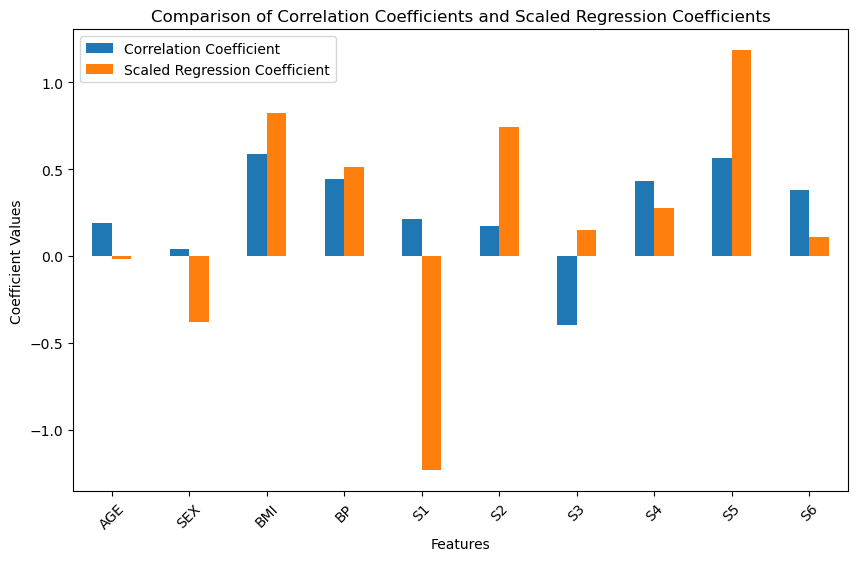

In [8]:
# Step 1: Compute correlation coefficients with the target variable Y
df = pd.read_csv('Diabetes_Data.csv', usecols=range(0, 11))
correlations = df.corr()['Y'].drop('Y')  # Drop the correlation of Y with itself

# Step 2: Compute the mean of the linear regression coefficients from cross-validation
mean_coefs = coefs.mean()

# Step 3: Scale the regression coefficients to make them comparable to the correlations (e.g., divide by 30)
scaled_coefs = mean_coefs / 30

# Step 4: Create a comparison dataframe with both correlation coefficients and scaled regression coefficients
comparison_df = pd.DataFrame({
    'Correlation Coefficient': correlations,
    'Scaled Regression Coefficient': scaled_coefs
})

# Step 5: Plot the comparison using a bar plot
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Correlation Coefficients and Scaled Regression Coefficients')
plt.ylabel('Coefficient Values')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()


### Exercise 2 (coeeficient variability in a simpler model)

Try fitting a linear regression model to a subset of the features. To do this, select 3-4 columns from the normalised dataframe `nX` to use when constructing the train-test split, then fit the model parameters to this new training data as before. Describe how you selected your subset of features. Did the model coefficients for your chosen features turn out to be similar or different to those in the full model given in pre-studio notebook? (Comment on change in variability of the coefficients. If there is a difference, explain why.)

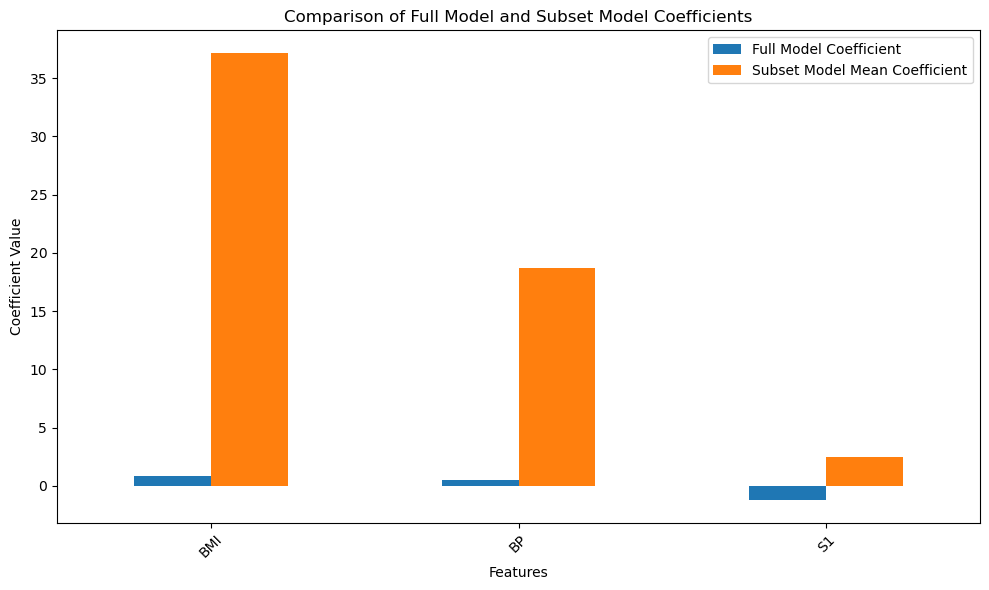

Subset model coefficient standard deviation:
BMI    1.289086
BP     1.475542
S1     1.769862
dtype: float64


In [9]:
# Select a subset of features
selected_features = ['BMI', 'BP', 'S1']  # One highly, one moderately, and one low-correlated feature

# Step 1: Train-test split using the selected features and normalized data
X_subset = nX[selected_features]
X_train_subset, X_test_subset, Y_train, Y_test = train_test_split(
    X_subset, Y, test_size=0.2, random_state=np.random.RandomState(31287)
)

# Step 2: Fit the linear regression model to the subset of features
linear_subset = LinearRegression()
linear_subset.fit(X_train_subset, Y_train)

# Step 3: Perform cross-validation to observe variability in the coefficients
scores_subset = cross_validate(
    linear_subset, X_subset, Y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=np.random.RandomState(2351786)),
    return_estimator=True,
)

# Step 4: Extract the coefficients from the cross-validation runs
subset_coefs_cv = pd.DataFrame([est.coef_ for est in scores_subset['estimator']], columns=selected_features)

# Step 5: Compute the mean and standard deviation of the subset coefficients
mean_subset_coefs = subset_coefs_cv.mean()
std_subset_coefs = subset_coefs_cv.std()

# Step 6: Compare with the full model coefficients
full_model_coefs = scaled_coefs[selected_features]  # Assuming scaled_coefs from Exercise 1

# Create a dataframe for comparison
comparison_subset_df = pd.DataFrame({
    'Full Model Coefficient': full_model_coefs,
    'Subset Model Mean Coefficient': mean_subset_coefs,
    'Subset Model Std Coefficient': std_subset_coefs
})

# Plot the comparison
comparison_subset_df[['Full Model Coefficient', 'Subset Model Mean Coefficient']].plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Full Model and Subset Model Coefficients')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the standard deviation to observe coefficient variability
print("Subset model coefficient standard deviation:")
print(std_subset_coefs)

***
In W8 pre-studio notebook we found the optimal tuning parameters ($\alpha$) for both Ridge and Lasso regularisation via numerical experimentation. In practice however, the process of tuning and fitting a linear regression with Ridge or Lasso regularisation is automated through the functions `RidgeCV` and `LassoCV` respectively. When we call the .fit method for `RidgeCV`, cross-valiadation is implemented by performing Ridge linear regression over a variety of tuning parameters in order to determine the optimal tuning parameter $\alpha$. Once the optimal tuning parameter is found, the model can then be fit. In fact, we can extract the optimal tuning parameter $\alpha$ by calling .alpha_. A similar process is utilised for `LassoCV`.

N.B. Both Ridge and Lasso regularisation require the feature set to be normalised. 

### Exercise 3 (RidgeCV)

Here you will use `RidgeCV` from scikit-learn to perform Ridge linear regression and cross validation all in one go. Your tasks are the following:

1. Instantiate the RidgeCV model by calling RidgeCV (done for you).
2. Fit the model to the training data.
3. Determine the training and testing R2 scores.
4. Call .alpha_ in order to determine the optimal tuning parameter alpha.

The syntax here is essentially the same as any other machine learning algorithm from scikit-learn. If you have any issues, you can consult the scikit-learn guide on `RidgeCV`.

Do you get the same optimal tuning parameter alpha as obtained in this notebook? Any idea why that is or isn't the case?

In [10]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score

# Step 1: Create an array of 21 alpha values logarithmically distributed between 10**(-2) and 10**2
alfas = np.logspace(-2, 2, num=21)

# Step 2: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y, test_size=0.2, random_state=1235
)

# Step 3: Instantiate the RidgeCV model with the specified alpha values
ridgecv = RidgeCV(alphas=alfas, store_cv_values=True)

# Step 4: Fit the model to the training data
ridgecv.fit(X_train, Y_train)

# Step 5: Determine the R^2 scores for both the training and testing data
r2_train = ridgecv.score(X_train, Y_train)
r2_test = ridgecv.score(X_test, Y_test)

# Step 6: Extract the optimal tuning parameter alpha
optimal_alpha = ridgecv.alpha_

# Output the results
print(f"Training R² score: {r2_train:.4f}")
print(f"Testing R² score: {r2_test:.4f}")
print(f"Optimal alpha: {optimal_alpha}")


Training R² score: 0.5311
Testing R² score: 0.4521
Optimal alpha: 1.584893192461114


### Exercise 4 (LassoCV)

Here you will use `LassoCV` from scikit-learn to perform Lasso linear regression and cross validation all in one go. Your tasks are the following:

1. Instantiate the LassoCV model by calling LassoCV (done for you).
2. Fit the model to the training data.
3. Determine the training and testing R2 scores.
4. Call .alpha_ in order to determine the optimal tuning parameter alpha.

The syntax here is essentially the same as any other machine learning algorithm from scikit-learn. If you have any issues, you can consult the scikit-learn guide on `LassoCV`.

Do you get the same optimal tuning parameter alpha as obtained in this notebook? Any idea why that is or isn't the case?

In [11]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

# Step 1: Create an array of 21 alpha values logarithmically distributed between 10**(-2) and 10**2
alfas = np.logspace(-2, 2, num=21)

# Step 2: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y, test_size=0.2, random_state=1235
)

# Step 3: Instantiate the LassoCV model with the specified alpha values
lassocv = LassoCV(alphas=alfas)

# Step 4: Fit the model to the training data
lassocv.fit(X_train, Y_train)

# Step 5: Determine the R^2 scores for both the training and testing data
r2_train = lassocv.score(X_train, Y_train)
r2_test = lassocv.score(X_test, Y_test)

# Step 6: Extract the optimal tuning parameter alpha
optimal_alpha = lassocv.alpha_

# Output the results
print(f"Training R² score: {r2_train:.4f}")
print(f"Testing R² score: {r2_test:.4f}")
print(f"Optimal alpha: {optimal_alpha}")


Training R² score: 0.5316
Testing R² score: 0.4507
Optimal alpha: 0.01


## Extra exercises

The following exercises with (*) will not be assessed. Use these to check your understanding of topics covered in the past 2 weeks.

### Exercise 5* (coefficient variability vs multicolinearity)

Similarly to the beginning of this notebook, repeat the k-fold cross-validation test for coefficient variability, but first remove the feature 'S2' from the dataset. Observe the impact on the coefficients for the other features. In particular, look at the coefficient for 'S1'. You should see that the range of values produced for the S1 coefficient is much narrower. Can you think of a reason why this is the case (consider the mathematical form of the model)?